In [34]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import t

In [81]:
data = pd.read_csv('17_sem_nal_Izak_Jenko/Pulz.csv')
pd.options.display.max_rows = 15

# Točka a)

In [112]:
obremenjeni = data[data['OBREMENITEV'] == 1]
sprememba_pulza = obremenjeni['PULZ2'] - obremenjeni['PULZ1']

n = len(sprememba_pulza)
X_bar = sprememba_pulza.mean()
s2 = sum((sprememba_pulza - X_bar)**2)/(n-1)
se_hat = np.sqrt(s2/n)


In [114]:
alpha = 0.01

T = X_bar/se_hat
t.ppf(alpha, n - 1)

T >= t.ppf(alpha, n - 1)

True

Opazimo torej, da je naša testna statistika $T$ večja od $F_{\text{Student}(n-1)}^{-1}(\alpha)$, kar pomeni, da ničelno hipotezo $H_0:\bar X \geq 0$ (z drugimi besedami, da se v povprečju študentom zviša pulz po aktivnosti) sprejmemo. 

# Točka b)

/Users/thrawn/Library/Python/3.7/lib/python/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


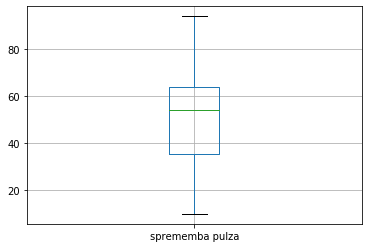

In [111]:
obremenjeni['sprememba pulza'] = obremenjeni['PULZ2'] - obremenjeni['PULZ1']
pd.DataFrame(obremenjeni['sprememba pulza']).boxplot()


In [108]:
pd.DataFrame(obremenjeni[obremenjeni['VADBA'] == 1]['sprememba pulza'])

,sprememba pulza
2,80
10,12
54,54
55,62
61,40
70,34
78,68


/Users/thrawn/Library/Python/3.7/lib/python/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


ValueError: cannot copy sequence with size 7 to array axis with dimension 2

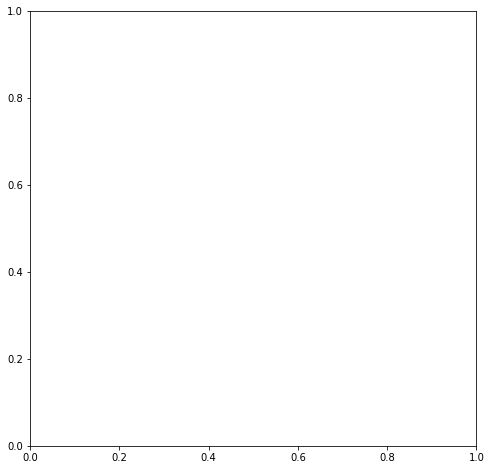

In [88]:
obremenjeni['sprememba pulza'] = obremenjeni['PULZ2'] - obremenjeni['PULZ1']
df_vadba = [
    pd.DataFrame(obremenjeni[obremenjeni['VADBA'] == i].groupby('sprememba pulza')) 
    for i in range(1,4)
]

fig = plt.figure(1, figsize=(8,8))
ax = fig.add_subplot(111)
ax.boxplot(df_vadba, patch_artist=True)


Še en način testiranja coreliranosti dveh stvari, je *test neodvisnosti s kontingenčno tabelo*

In [60]:
obremenjeni = data[data['OBREMENITEV'] == 1]
sprememba_pulza_obremenjeni = obremenjeni['PULZ2'] - obremenjeni['PULZ1']

neobremenjeni = data[data['OBREMENITEV'] == 2]
sprememba_pulza_neobremenjeni = neobremenjeni['PULZ2'] - neobremenjeni['PULZ1']

tabela = pd.DataFrame(
    {
        "pulz se poviša":[
            sprememba_pulza_obremenjeni[sprememba_pulza_obremenjeni > 10].count(),
            sprememba_pulza_neobremenjeni[sprememba_pulza_neobremenjeni > 10].count()
            ],
        "pulz se ohrani":[100,100],
    },
    index=['obremenitev', 'brez obremenitve']
)

tabela

,pulz se poviša,pulz se ohrani
obremenitev,45,100
brez obremenitve,0,100


In [54]:
sprememba_pulza[sprememba_pulza > 0].count()
obremenjeni[obremenjeni['PULZ2'] - obremenjeni['PULZ1'] > 30].count()

VISINA         37
TEZA           37
STAROST        37
SPOL           37
KADI           37
ALKOHOL        37
VADBA          37
OBREMENITEV    37
PULZ1          37
PULZ2          37
LETO           37
dtype: int64

5

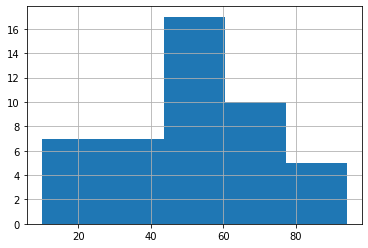

In [83]:
sprememba_pulza = obremenjeni['PULZ2'] - obremenjeni['PULZ1']
# sprememba_pulza.hist(bins=5)
# sprememba_pulza[sprememba_pulza > 76].count()

df_vadba = [pd.DataFrame(obremenjeni[obremenjeni['VADBA'] == i]) for i in range(4)]

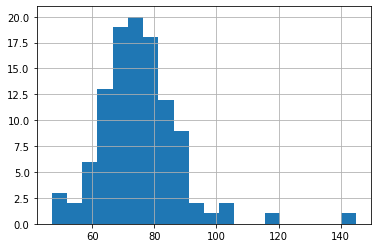

In [26]:
data['PULZ1'].hist(bins=20)

# Točka c)
Naš vzorec bomo razdelili glede na vadbo študentov (vadi veliko, vadi zmerni in vadi malo) in nato primerjali povprečja spremembe pulza po vseh treh skupinah. Če vadba ne vpliva na spremembo pulza, bi morala bit ta tri povprečja približno enaka. To pa bo tudi naša ničelna hipoteza.

In [139]:
obremenjeni['sprememba pulza'] = obremenjeni['PULZ2'] - obremenjeni['PULZ1']
df_vadba = [obremenjeni[obremenjeni['VADBA'] == i] for i in range(1,4)]


/Users/thrawn/Library/Python/3.7/lib/python/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [140]:
df_vadba = [obremenjeni[obremenjeni['VADBA'] == i] for i in range(1,4)]

Y_bar = [df_vadba[i]['sprememba pulza'].mean() for i in range(3)]
N = [df_vadba[i]['sprememba pulza'].count() for i in range(3)]
s2 = [sum((df_vadba[i]['sprememba pulza'] - Y_bar[i])**2) / (N[i] - 1) for i in range(3)]

In [157]:
# testiramo H_0: Y_bar_1 = Y_bar_2
alpha = 0.05

T12 = (Y_bar[0] - Y_bar[1]) / np.sqrt(s2[0]/N[0] + s2[1]/N[1])
v = (s2[0]/N[0] + s2[1]/N[1])**2 / ( (s2[0]/N[0])**2/(N[0] - 1) + (s2[1]/N[1])**2/(N[1] - 1) )

print(T12)
t.ppf(1 - alpha, v)
# s tem testom tega ne moremo zavrniti


-0.27330070355324115


1.8225485181109373

In [152]:
# testiramo Y_bar_2 = Y_bar_3
alpha = 0.05

T23 = (Y_bar[1] - Y_bar[2]) / np.sqrt(s2[1]/N[1] + s2[2]/N[2])
v = (s2[1]/N[1] + s2[2]/N[2])**2 / ( (s2[1]/N[1])**2/(N[1] - 1) + (s2[2]/N[2])**2/(N[2] - 1) )

print(T23)
print(t.ppf(1 - alpha/2, v))
# s tem testom tega ne moremo zavrniti


0.4303032601133276
2.038126742535558


In [156]:
# testiramo Y_bar_1 = Y_bar_3
alpha = 0.05

T13 = (Y_bar[0] - Y_bar[2]) / np.sqrt(s2[0]/N[0] + s2[2]/N[2])
v = (s2[0]/N[0] + s2[2]/N[2])**2 / ( (s2[0]/N[0])**2/(N[0] - 1) + (s2[2]/N[2])**2/(N[2] - 1) )

print(T13)
print(t.ppf(1 - alpha/2, v))
# s tem testom tega ne moremo zavrniti


0.02135379367516377
2.225588777708017
